<a href="https://colab.research.google.com/github/sexymonster/DO_EAT/blob/model/doeat082v5m.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd /content
!git clone https://github.com/ultralytics/yolov5.git #깃허브에서 yolov5를 클론합니다

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 13175, done.
remote: Counting objects: 100% (173/173), done.
remote: Compressing objects: 100% (104/104), done.
remote: Total 13175 (delta 97), reused 137 (delta 69), pack-reused 13002
Receiving objects: 100% (13175/13175), 12.67 MiB | 18.00 MiB/s, done.
Resolving deltas: 100% (9006/9006), done.


In [ ]:
%cd /content/yolov5/
!pip install -r requirements.txt # yolov5 패키지를 다운로드합니다.

/content/yolov5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 596 kB 4.0 MB/s 
     |████████████████████████████████| 1.6 MB 39.6 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from google.colab import drive#구글드라이브에서 데이터를 불러옵니다

drive.mount("/content/gdrive")


Mounted at /content/gdrive


In [ ]:
pwd%

In [ ]:
%cat /content/gdrive/MyDrive/ColabNotebooks/do_eat/data.yaml
# yaml은 train 경로와 tset경로 nc는 클래스개수 네임스는 클래스네임을 뜻합니다.

names:
- bean sprouts
- beef
- chicken
- egg
- fork
- garlic
- green onion
- kimchi
- onion
- photato
- spam
nc: 11
test: /content/gdrive/MyDrive/ColabNotebooks/do_eat/test.txt
train: /content/gdrive/MyDrive/ColabNotebooks/do_eat/train.txt
val: /content/gdrive/MyDrive/ColabNotebooks/do_eat/test.txt


In [ ]:
%cd /
from glob import glob

img_train_list = glob('/content/gdrive/MyDrive/ColabNotebooks/do_eat/train/images/*.jpg')
img_test_list = glob('/content/gdrive/MyDrive/ColabNotebooks/do_eat/test/images/*.jpg')


print(len(img_train_list))
print(len(img_test_list))
#glob는 파일들의 리스트를 뽑을 때 사용하는데, 파일의 경로명을 이용해서 입맛대로 요리할 수 있습니다.
#golb를 이용하여 train데이터와 test데이터를 불러옵니다

/
631
95


In [ ]:
with open('/content/gdrive/MyDrive/ColabNotebooks/do_eat/train.txt','w') as f:
  f.write('\n'.join(img_train_list)+'\n')

with open('/content/gdrive/MyDrive/ColabNotebooks/do_eat/test.txt','w') as f:
  f.write('\n'.join(img_test_list)+'\n')
# train데이터와 test 데이터의 경로를 txt 파일로 저장을합니다.

In [ ]:
import yaml

In [ ]:
with open('/content/gdrive/MyDrive/ColabNotebooks/do_eat/data.yaml','r') as f:
  data = yaml.load(f,Loader=yaml.FullLoader)

print(data)

data['train'] = '/content/gdrive/MyDrive/ColabNotebooks/do_eat/train.txt'
data['val'] = '/content/gdrive/MyDrive/ColabNotebooks/do_eat/test.txt'

with open('/content/gdrive/MyDrive/ColabNotebooks/do_eat/data.yaml', 'w') as f:
  yaml.dump(data, f)

print(data)
#train데이터와 test데이터정보가 담긴 것을 yaml파일로 다시 업그레이드 합니다.
#계속 학습을 하다보니 yaml 데이터가 덮어씌워지기가 되었다.

{'names': ['bean sprouts', 'beef', 'chicken', 'egg', 'fork', 'garlic', 'green onion', 'kimchi', 'onion', 'photato', 'spam'], 'nc': 11, 'test': '/content/gdrive/MyDrive/ColabNotebooks/do_eat/test.txt', 'train': '/content/gdrive/MyDrive/ColabNotebooks/do_eat/train.txt', 'val': '/content/gdrive/MyDrive/ColabNotebooks/do_eat/test.txt'}
{'names': ['bean sprouts', 'beef', 'chicken', 'egg', 'fork', 'garlic', 'green onion', 'kimchi', 'onion', 'photato', 'spam'], 'nc': 11, 'test': '/content/gdrive/MyDrive/ColabNotebooks/do_eat/test.txt', 'train': '/content/gdrive/MyDrive/ColabNotebooks/do_eat/train.txt', 'val': '/content/gdrive/MyDrive/ColabNotebooks/do_eat/test.txt'}


In [ ]:
%pwd

'/content/yolov5'

In [ ]:
print(data.yaml)

In [ ]:
%cd /content/yolov5/

!python train.py --img 416 --batch 16 --epochs 300 --data /content/gdrive/MyDrive/ColabNotebooks/do_eat/data.yaml --cfg ./models/yolov5m.yaml  --weights yolov5m.pt --name doeat_yolov5m_results
#yaml 파일을 가지고 yolov5 모델을 학습합니다.

/content/yolov5
train: weights=yolov5m.pt, cfg=./models/yolov5m.yaml, data=/content/gdrive/MyDrive/ColabNotebooks/do_eat/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=doeat_yolov5m_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-400-gfd004f5 Python-3.7.13 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=

In [ ]:
%load_ext tensorboard
%tensorboard --logdir /content/yolov5/runs

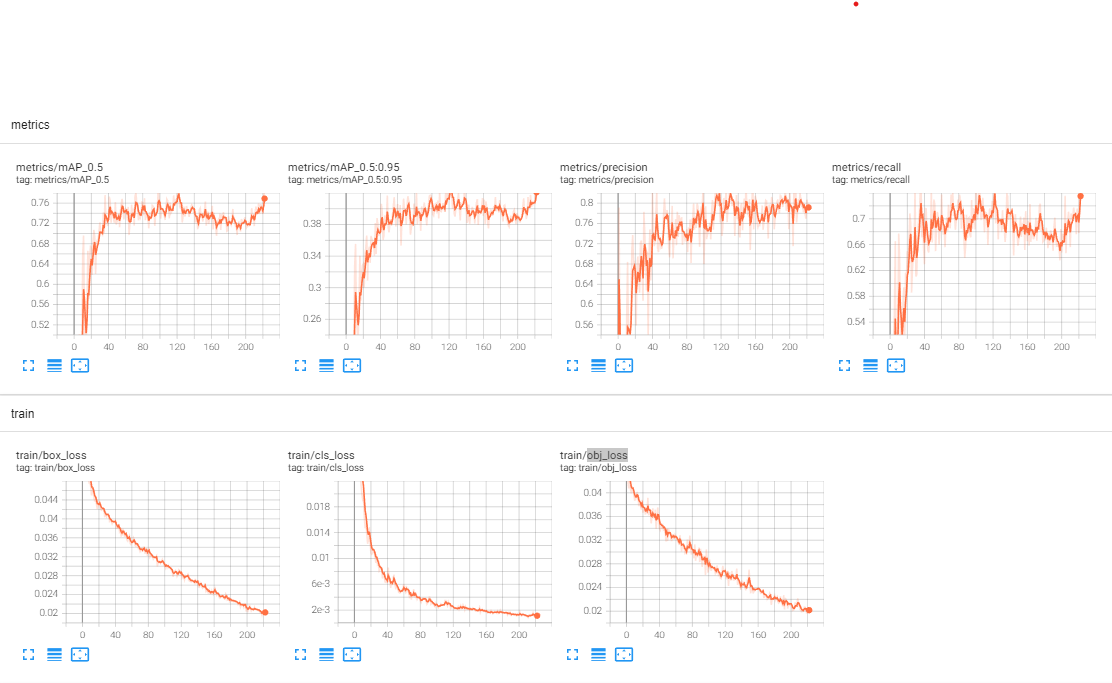

In [ ]:
from IPython.display import Image
import os

In [ ]:
img_test_path = img_test_list[0]

!python detect.py --weights /content/yolov5/runs/train/gun_yolov5s_results/weights/best.pt --img 416 --conf 0.5 "img_test_path"
Image(os.path.join('',os.path.basename(img_test_path)))

In [ ]:
!pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
image_path = '/content/gdrive/MyDrive/ColabNotebooks/do_eat/train/images/'

img_list = os.listdir(image_path)
img_list_jpg = [img for img in img_list if img.endswith(".jpg")]

print("img_list_jpg: {}".format(img_list_jpg))

In [ ]:
img_list_np = []

for i  in img_list_jpg:
  img = Image.open(image_path + i)
  img_array = np.array(img)
  img_list_np.append(img_array)
  print(i, "추가 완료 - 구조:", img_array.shape)


In [ ]:
print(img_array.shape)

(416, 416, 3)


In [ ]:
img_np = np.array(img_list_np)
print(img_np.shape)

(631, 416, 416, 3)


In [ ]:
img_np = img_np.reshape(631,416*416*3)
print(img_np.shape)

(631, 519168)


In [ ]:
from sklearn.model_selection import train_test_split

x_train, y_train = train_test_split(img_np, test_size=0.3, random_state=2000)

print(len(x_train), len(y_train))


441 190


In [ ]:
x_train = (x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2] * x_train.shape[3]))
y_train = (y_train.reshape(y_train.shape[0], y_train.shape[1] * y_train.shape[2] * y_train.shape[3]))


AttributeError: ignored

In [ ]:
x_train.shape

AttributeError: ignored

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
# #sklearn 라이브러리에서 KNN 분류 모형 가져오기
# from sklearn.neighbors import KNeighborsClassifier

# # 모형 객체 생성(k=5로 설정)
# knn = KNeighborsClassifier(n_neighbors=5)

# # train data를 가지고 모형 학습
# knn.fit(x_train, y_train)

# test data를 가지고 y_hat을 예측(분류)
# y_hat = knn.predict(x_test)|

In [ ]:

knns =[]

for i in range(2,5):
  knc = KNeighborsClassifier(i)
  knc.fit(x_train, y_train)
  print("이웃수 : {}인 모델 학습 완료".format(i))
  knns.append(knc)

ValueError: ignored

In [ ]:
for model in knns:
  acc = model.score(x_test, y_test)
  print(acc)